# Plotting the results of few-shot classification
Prompting strategy: textual data format, Random sampler

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
metrics_df = pd.read_csv('text_random_metrics.csv')
metrics_df.head()

,provider,engine,sampler,n_for_train,seed,dataset,accuracy,precision,recall,f1
0,anthropic,claude-3-haiku-20240307,random,2,36,data/USPTO_R_text.csv,0.52,0.515152,1.000000,0.680000
1,anthropic,claude-3-haiku-20240307,random,4,12345,data/USPTO_R_text.csv,0.56,0.577778,0.509804,0.541667
2,anthropic,claude-3-haiku-20240307,random,2,42,data/USPTO_R_text.csv,0.52,0.515152,1.000000,0.680000
3,anthropic,claude-3-haiku-20240307,random,2,84,data/USPTO_R_text.csv,0.52,0.515152,1.000000,0.680000
4,anthropic,claude-3-haiku-20240307,random,2,200,data/USPTO_R_text.csv,0.52,0.515152,1.000000,0.680000


In [3]:
df = metrics_df.copy()
df.drop(columns=['sampler', 'seed', 'dataset', 'precision', 'recall', 'provider', 'n_for_train'], inplace=True)

In [4]:
# Group by model
df_mean = df.groupby(by=['engine']).mean()

# Round metrics
df_mean.accuracy = df_mean.accuracy.apply(lambda x: np.round(x, 2))
df_mean.f1 = df_mean.f1.apply(lambda x: np.round(x, 2))

# Calculate the average between accuracy and F1
df_mean['avg'] = df_mean['accuracy']/2 + df_mean['f1']/2
# Sort values by average
df_mean = df_mean.sort_values(by='avg')

df_mean.reset_index(inplace=True)
df_mean

,engine,accuracy,f1,avg
0,gpt-4,0.53,0.45,0.490
1,gpt-3.5-turbo,0.53,0.56,0.545
2,claude-3-opus-20240229,0.52,0.61,0.565
3,mistral-large-latest,0.58,0.57,0.575
4,claude-3-haiku-20240307,0.54,0.65,0.595
5,mistral-small-latest,0.57,0.63,0.600


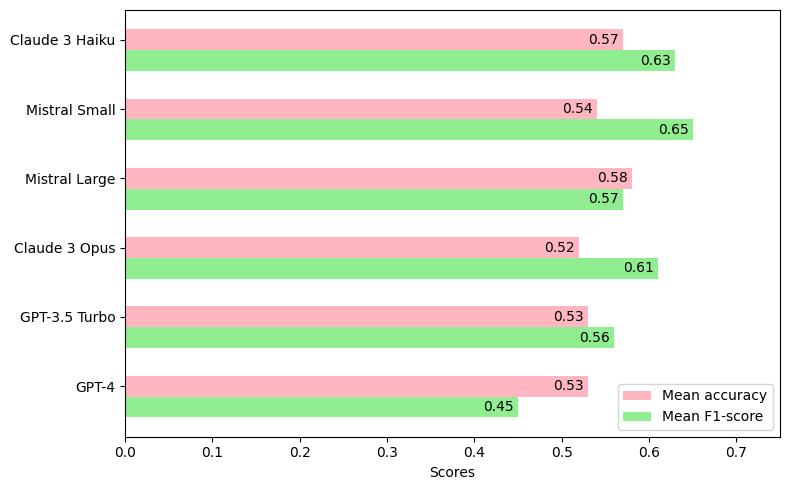

In [5]:
# Visualize results
x = np.arange(0, 6)
width = 0.3
plt.subplots(figsize=(8, 5))
bar1 = plt.barh(x, df_mean.accuracy, width, color='lightpink')
bar2 = plt.barh(x-width, df_mean.f1, width, color='lightgreen')
for rect in bar1 + bar2:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    label = '{:,.2f}'.format(x_value)
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(-25, 0),
        textcoords='offset points',
        va='center',
        ha='left')
plt.yticks(x, ['GPT-4', 'GPT-3.5 Turbo', 'Claude 3 Opus', 'Mistral Large', 'Mistral Small', 'Claude 3 Haiku'])
plt.xlabel("Scores")
plt.legend(["Mean accuracy", "Mean F1-score"], loc='lower right')
plt.xlim(0, 0.75)
plt.tight_layout()
#plt.savefig('models_comparison.jpg', format='jpg', dpi=600)
plt.show()

In [6]:
df = metrics_df[metrics_df.engine.isin(['claude-3-haiku-20240307', 'mistral-small-latest'])]
df.drop(columns=['sampler', 'seed', 'dataset', 'precision', 'recall', 'provider'], inplace=True)

C:\Users\computer\AppData\Local\Temp\ipykernel_21640\387541897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['sampler', 'seed', 'dataset', 'precision', 'recall', 'provider'], inplace=True)


In [7]:
df_k = df.groupby(by=['engine', 'n_for_train']).mean()
df_k

accuracy        f1
engine                  n_for_train                    
claude-3-haiku-20240307 2               0.520  0.680000
                        4               0.566  0.589456
                        6               0.548  0.674902
                        8               0.544  0.676820
                        10              0.532  0.651406
mistral-small-latest    2               0.510  0.657343
                        4               0.590  0.604098
                        6               0.606  0.634288
                        8               0.558  0.623614
                        10              0.568  0.610692

In [8]:
k = [2, 4, 6, 8, 10]
c3h = [0.6, 0.58, 0.61, 0.61, 0.59]
ms = [0.585, 0.595, 0.62, 0.59, 0.59]
best_y = [0.61, 0.62]
best_x = [6, 6]

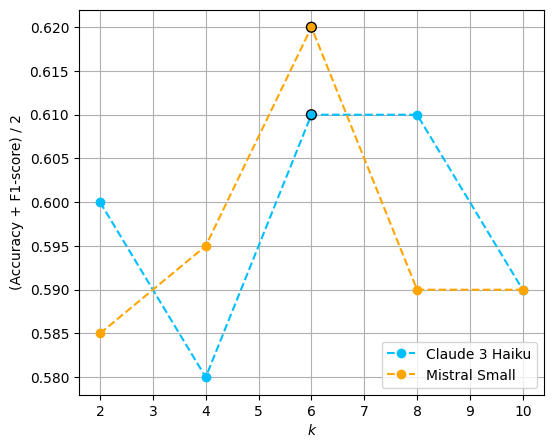

In [9]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(k, c3h, label='Claude 3 Haiku', linestyle='--', marker='o', color='deepskyblue')
plt.plot(k, ms, label='Mistral Small', linestyle='--', marker='o', color='orange')
ax.scatter(best_x, best_y, s=50, edgecolor='black', zorder=6, facecolors='none', linewidth=1)
plt.xlabel("k", style='italic')
plt.ylabel("(Accuracy + F1-score) / 2")
plt.legend(loc='lower right')
plt.grid()
#plt.savefig('c3h_ms_best_k.jpg', format='jpg', dpi=700, bbox_inches='tight')
plt.show()